**Data Preparation and Preprocessing (5%)**
 • Load the dataset and handle missing values (imputation, removal, etc.).
 • Perform exploratory data analysis (EDA) to understand feature distribu
tions and class imbalance.
 • Normalize or standardize features where necessary.
 • Encode categorical variables properly (e.g., one-hot encoding or label en
coding). v Split the dataset into training and testing sets

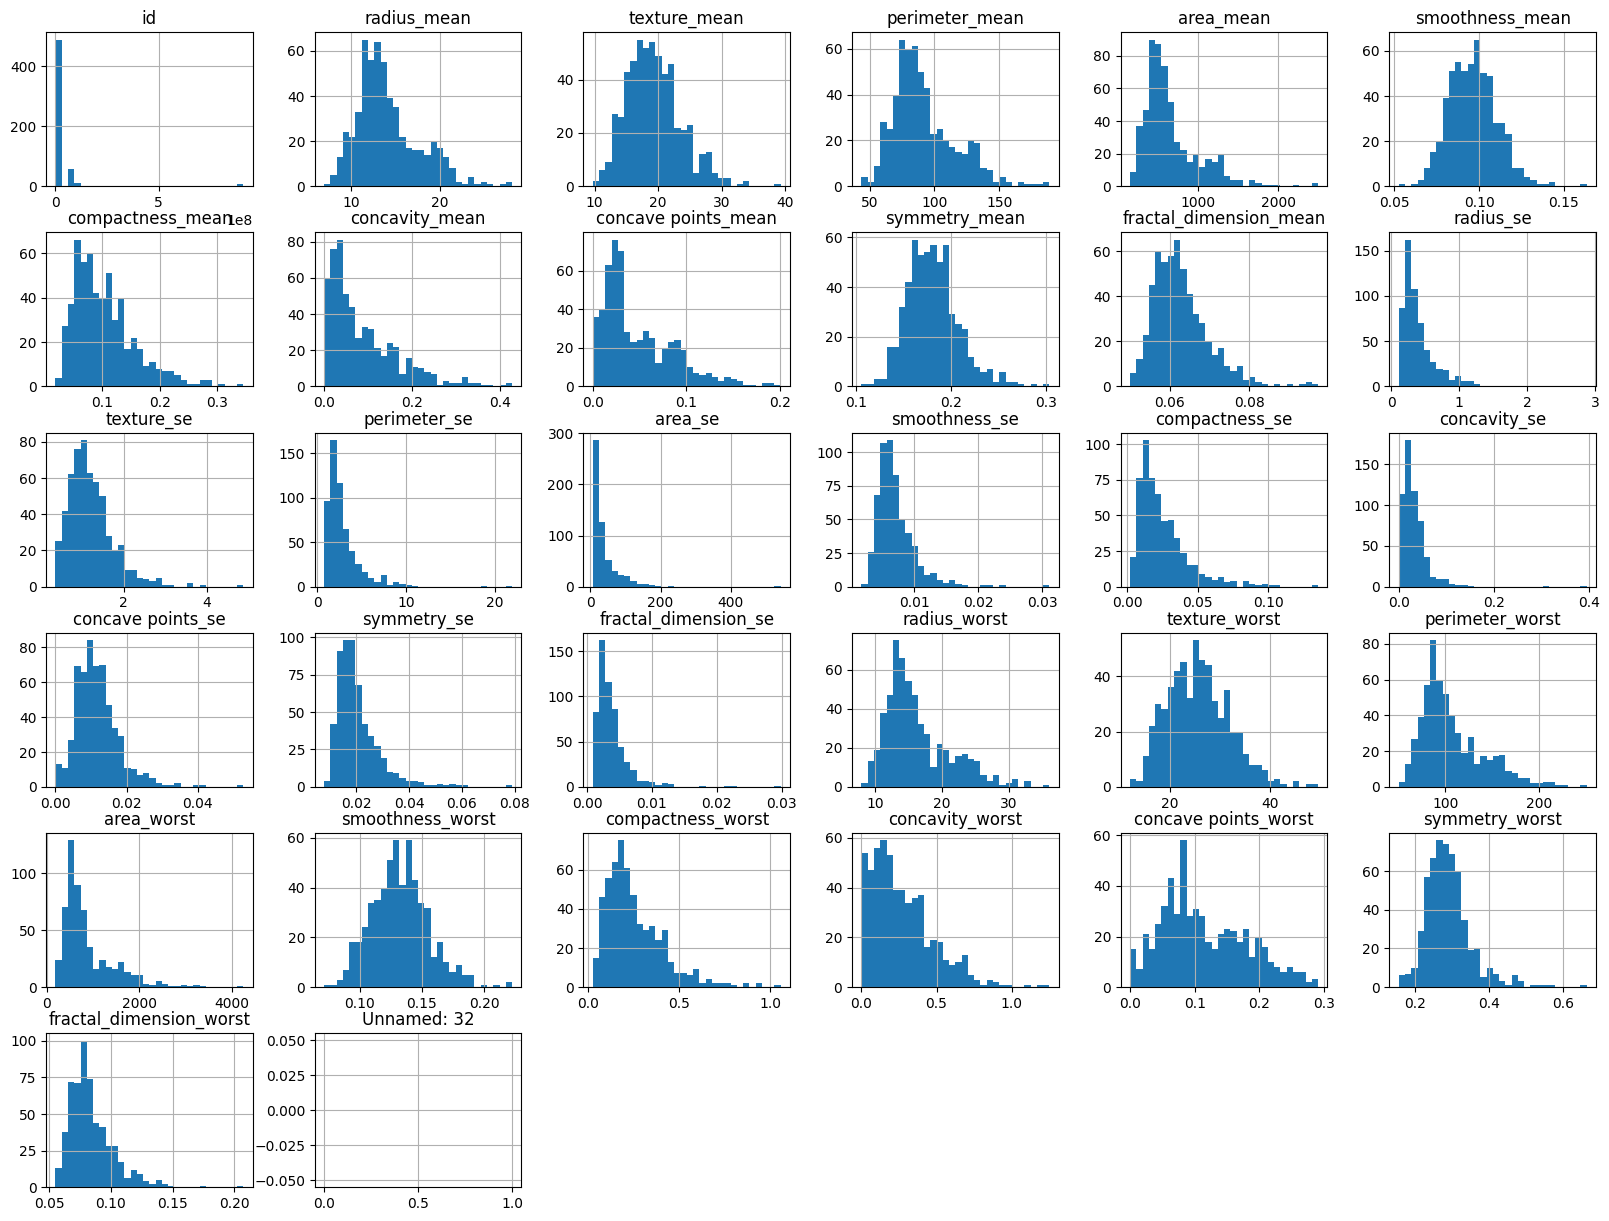

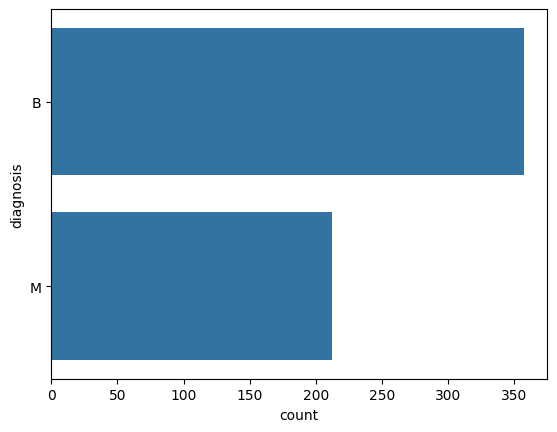

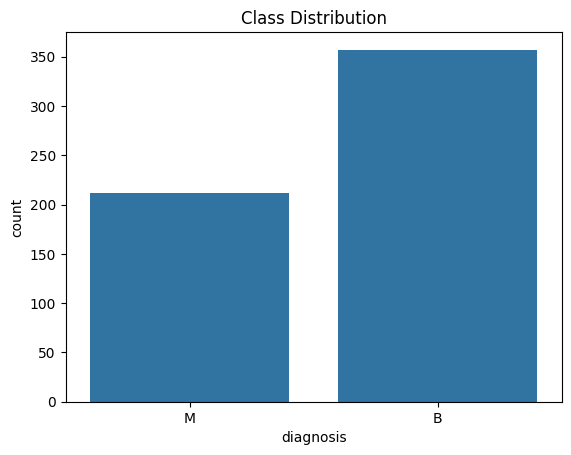

Class Imbalance Ratio: 1.6839622641509433
Training set size: (455, 32), Testing set size: (114, 32)


<ipython-input-2-a1ec505d5bee>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imbalance_ratio = class_counts[0] / class_counts[1]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/data.csv')

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

data.hist(bins=30, figsize=(20, 15))
plt.show()

for column in data.select_dtypes(include='object').columns:
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.show()

sns.countplot(x='diagnosis', data=data)
plt.title('Class Distribution')
plt.show()

class_counts = data['diagnosis'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Class Imbalance Ratio: {imbalance_ratio}")

scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(['diagnosis'])
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

The Class Imbalance Ratio: 1.6839622641509433 refers to the ratio of the majority class to the minority class in the target variable (diagnosis) in dataset.
A ratio of 1.68 means that the majority class occurs approximately 1.68 times more frequently than the minority class. This indicates a slight imbalance in the dataset but not an extreme one.

Class imbalance can affect the performance of machine learning models, as they may become biased toward the majority class.
Depending on the severity of the imbalance, techniques like resampling (oversampling the minority class or undersampling the majority class) or using algorithms robust to imbalance may be required.

**1.2 Implement Classification Models (20%)**
 Implement the following models using ‘scikit-learn‘:
 • Logistic Regression (with and without L1/L2 regularization)
 • K-Nearest Neighbors (KNN)
 • Support Vector Machine (SVM) (with different kernels: linear, RBF, poly
nomial)
 • Decision Tree Classifier (analyze depth and pruning effects)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Logistic Regression (No Regularization):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression (L2 Regularization):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Logistic Regression (L1 Regularization):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   ma

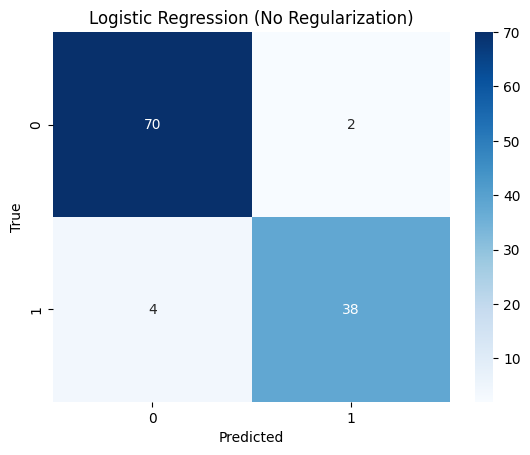

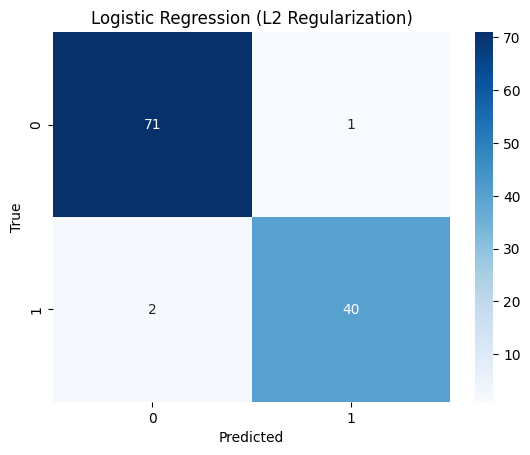

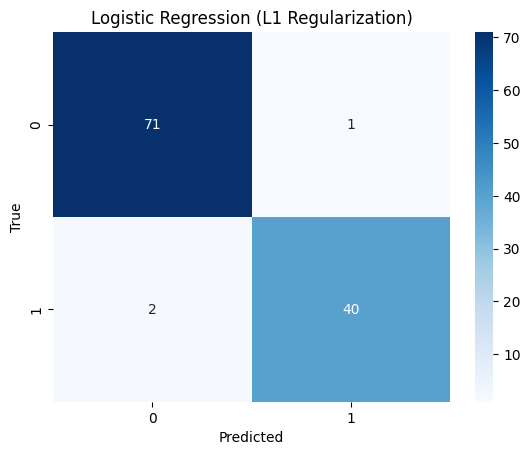

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

logreg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logreg.fit(X_train_imputed, y_train)
y_pred_logreg = logreg.predict(X_test_imputed)

print("Logistic Regression (No Regularization):")
print(classification_report(y_test, y_pred_logreg))

logreg_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
logreg_l2.fit(X_train_imputed, y_train)
y_pred_logreg_l2 = logreg_l2.predict(X_test_imputed)

print("Logistic Regression (L2 Regularization):")
print(classification_report(y_test, y_pred_logreg_l2))

logreg_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train_imputed, y_train)
y_pred_logreg_l1 = logreg_l1.predict(X_test_imputed)

print("Logistic Regression (L1 Regularization):")
print(classification_report(y_test, y_pred_logreg_l1))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression (No Regularization)")
plot_confusion_matrix(y_test, y_pred_logreg_l2, "Logistic Regression (L2 Regularization)")
plot_confusion_matrix(y_test, y_pred_logreg_l1, "Logistic Regression (L1 Regularization)")

**No Regularization:**
Accuracy: 95%,
Slightly lower performance on the minority class (`1`).

**L2 Regularization:**
Accuracy: 97%,
Better performance on both classes, especially recall for the minority class.

**L1 Regularization:**
Accuracy: 97%, Similar to L2, with identical metrics.

L2 and L1 regularization improve accuracy and generalization compared to no regularization.
Both regularization methods handle class imbalance well, with high precision and recall for both classes.
L2 regularization is recommended for its simplicity and strong performance.

Use Logistic Regression with L2 Regularization for better accuracy and robustness.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



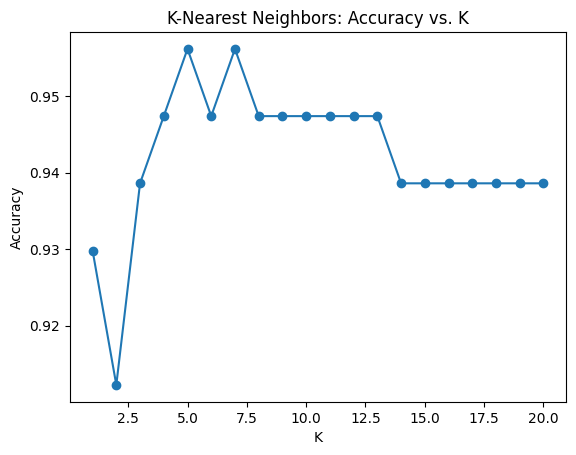

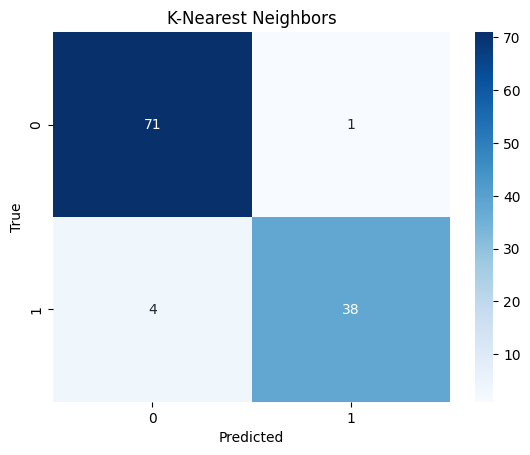

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)
y_pred_knn = knn.predict(X_test_imputed)

print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_imputed, y_train)
    y_pred = knn.predict(X_test_imputed)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o')
plt.title("K-Nearest Neighbors: Accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

**Accuracy:** 96% overall.

**Class 0 ("Benign"):** High precision (95%) and recall (99%).

**Class 1 ("Malignant"):** High precision (97%) but slightly lower recall (90%).
Strong performance for both classes, with slight imbalance in recall for the minority class (1).

Tuning K (number of neighbors) can further optimize accuracy.

KNN works well, achieving 96% accuracy, but fine-tuning K may improve results.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

SVM (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        72
           1       1.00      0.67      0.80        42

    accuracy                           0.88       114
   macro avg       0.92      0.83      0.86       114
weighted a

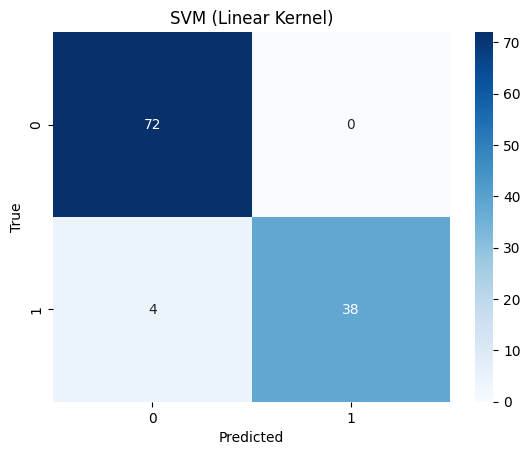

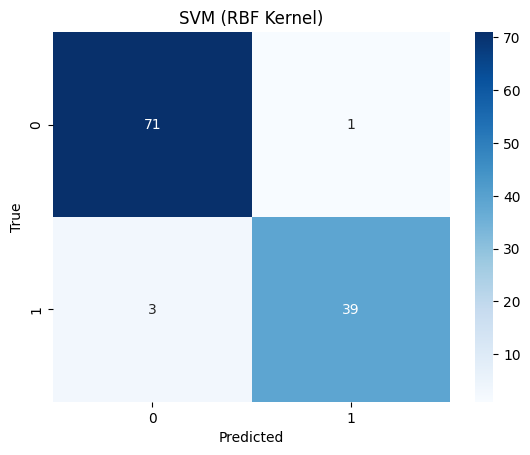

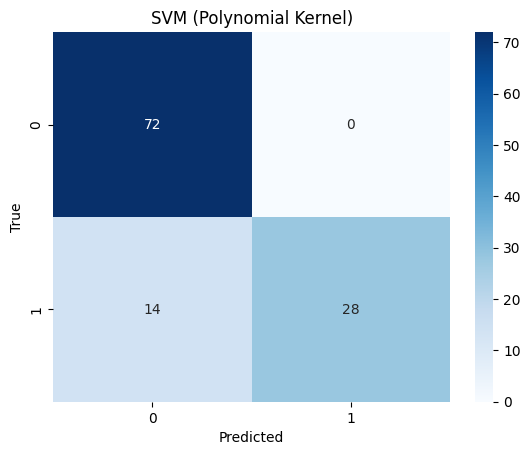

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_imputed, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_imputed)

print("SVM (Linear Kernel):")
print(classification_report(y_test, y_pred_svm_linear))

svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_imputed, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test_imputed)

print("SVM (RBF Kernel):")
print(classification_report(y_test, y_pred_svm_rbf))

svm_poly = SVC(kernel='poly', degree=3, probability=True)
svm_poly.fit(X_train_imputed, y_train)
y_pred_svm_poly = svm_poly.predict(X_test_imputed)

print("SVM (Polynomial Kernel):")
print(classification_report(y_test, y_pred_svm_poly))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm_linear, "SVM (Linear Kernel)")
plot_confusion_matrix(y_test, y_pred_svm_rbf, "SVM (RBF Kernel)")
plot_confusion_matrix(y_test, y_pred_svm_poly, "SVM (Polynomial Kernel)")

**Linear Kernel:**
Accuracy: 96%.
Strong performance, but slightly lower recall for minority class (1).

**RBF Kernel:**
Accuracy: 96%.
Best balance between precision and recall for both classes.

**Polynomial Kernel:**
Accuracy: 88%.
Poor performance, especially for minority class (1).

RBF Kernel is the best choice (balanced and accurate).
Avoid Polynomial Kernel due to poor handling of class imbalance.

Decision Tree (Default Parameters):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.88      0.90      0.89        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



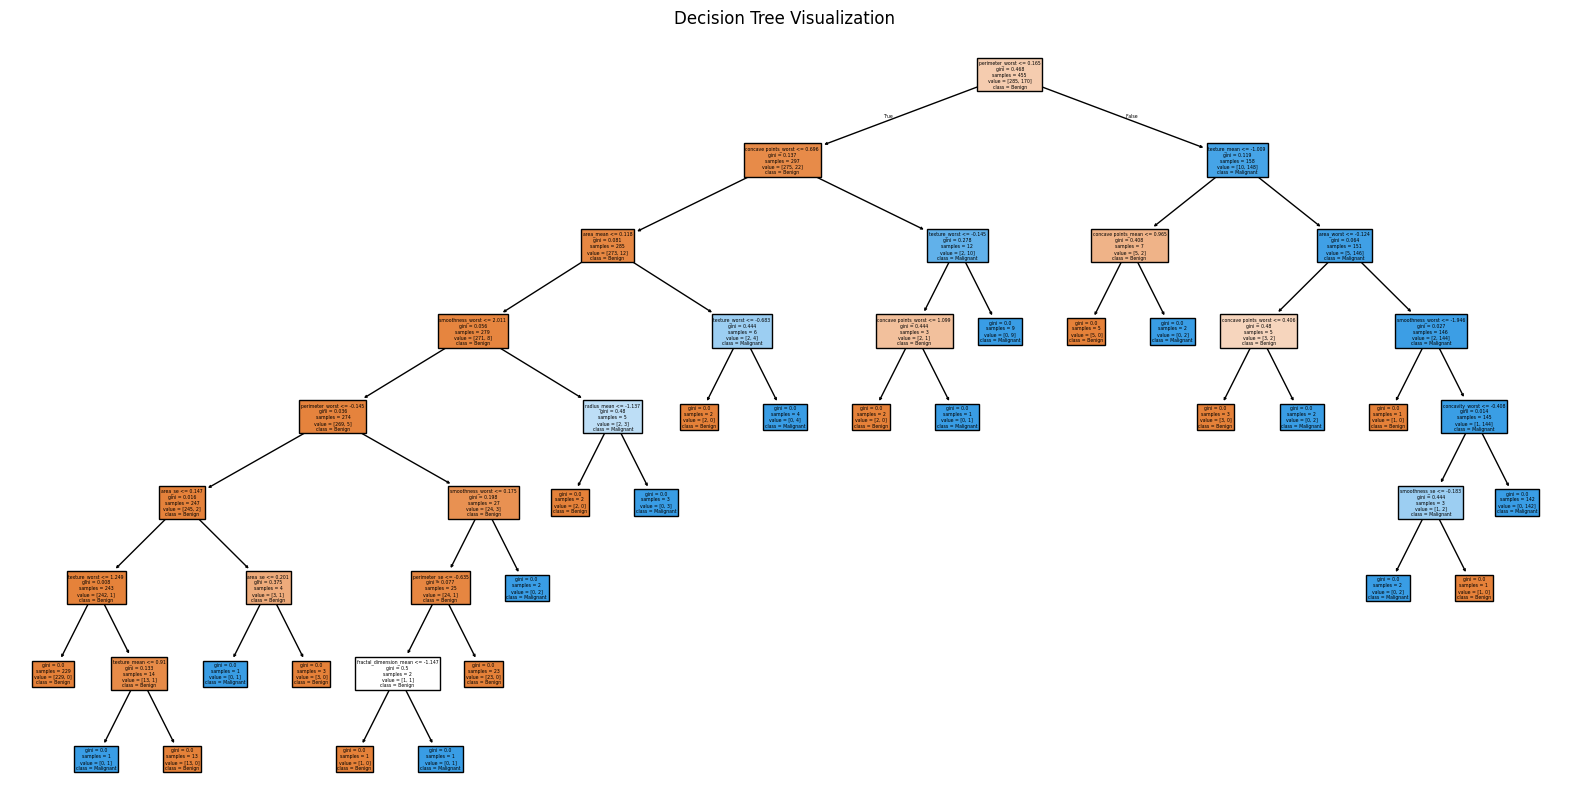

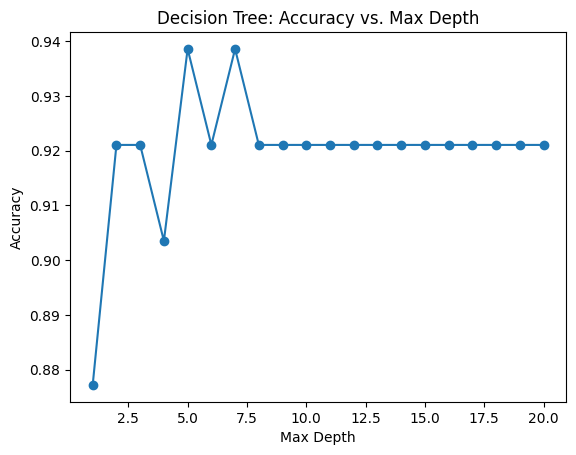

Decision Tree (Pruned):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



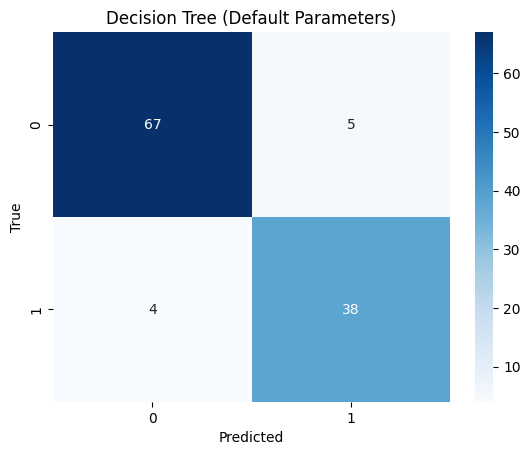

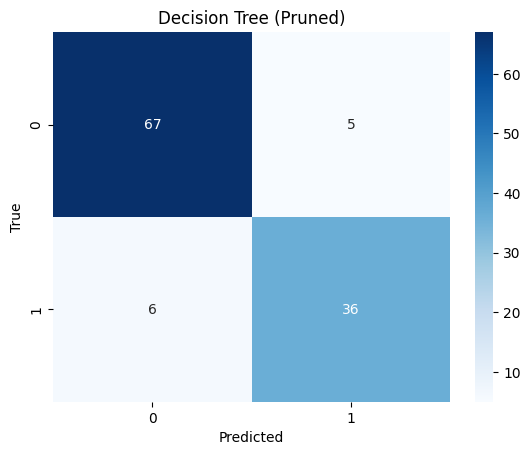

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree (Default Parameters):")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

accuracy_scores = []
depth_values = range(1, 21)
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(depth_values, accuracy_scores, marker='o')
plt.title("Decision Tree: Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

dt_pruned = DecisionTreeClassifier(min_samples_split=10, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_dt_pruned = dt_pruned.predict(X_test)

print("Decision Tree (Pruned):")
print(classification_report(y_test, y_pred_dt_pruned))

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree (Default Parameters)")
plot_confusion_matrix(y_test, y_pred_dt_pruned, "Decision Tree (Pruned)")

**Default Parameters:**
Accuracy: 92%.
Balanced performance for both classes.

**Pruned Tree:**
Accuracy: 90%.
Slightly lower performance but better generalization.

Default tree is more accurate but risks overfitting.
Pruned tree is simpler and more generalizable, with slightly lower accuracy.

**1.3 Regularization Techniques (10%)**
 • Apply L1 (Lasso) and L2 (Ridge) regularization for Logistic Regression
 and analyze their effects.
 • Use cross-validation, GridSearchCV for hyperparameter tuning.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9780219780219781
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



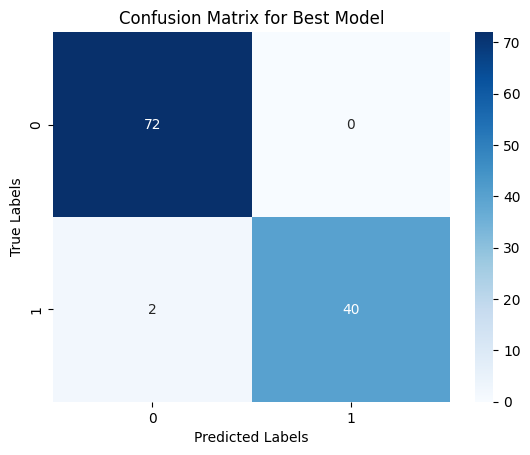

Coefficients for L1 Regularization:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.99062632 0.         0.         0.30612827
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         2.08643374 0.68626742 0.
  0.         0.1946961  0.         0.         0.39575086 0.25026659
  0.        ]]


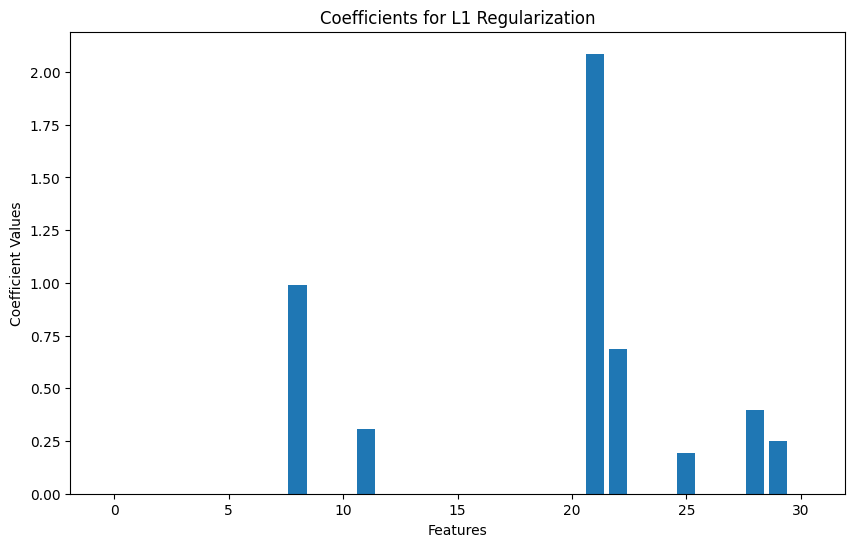

Coefficients for L2 Regularization:
[[ 0.03896693  0.36133917  0.41486198  0.35313582  0.37821058  0.17990968
   0.01276595  0.35521787  0.45297486  0.03782322 -0.1591188   0.4861904
  -0.04557316  0.36119371  0.40604992  0.05145633 -0.27307162 -0.06641939
   0.11365306 -0.08664687 -0.23939793  0.50270691  0.5870115   0.46084957
   0.49106741  0.35569769  0.10219879  0.36043025  0.41864693  0.44578345
   0.09712207]]


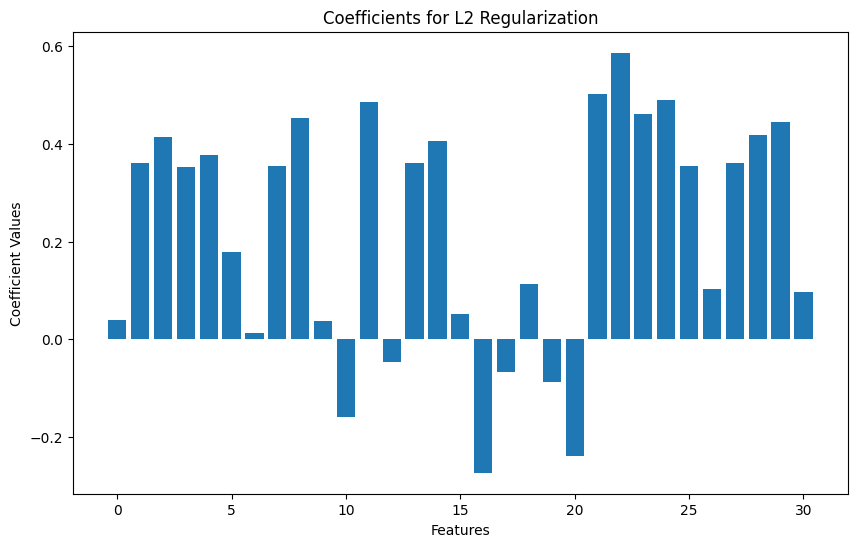

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_logreg = grid_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test_imputed)

print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best_logreg))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test, y_pred_best_logreg, "Confusion Matrix for Best Model")

for penalty in ['l1', 'l2']:
    model = LogisticRegression(penalty=penalty, C=grid_search.best_params_['C'], solver='liblinear', max_iter=1000)
    model.fit(X_train_imputed, y_train)
    print(f"Coefficients for {penalty.upper()} Regularization:")
    print(model.coef_)

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(model.coef_[0])), model.coef_[0])
    plt.title(f"Coefficients for {penalty.upper()} Regularization")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Values")
    plt.show()

**Best Model:** L2 Regularization with C=0.1.
Accuracy: **98%**.
Excellent performance for both classes (Benign and Malignant).

**L1 Regularization:** Sparse coefficients (feature selection) but slightly lower performance.

Use L2 regularization for the best balance of accuracy and generalization.

**1.4 Model Evaluation (5%)**
 Evaluate models using the following metrics:
 • Accuracy
 • Precision, Recall, and F1-score
 • Confusion Matrix
 • Receiver Operating Characteristic (ROC) Curve and Area Under the Curve
 (AUC)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Evaluation Metrics for Logistic Regression:
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-Score: 0.9639
AUC: 0.9967


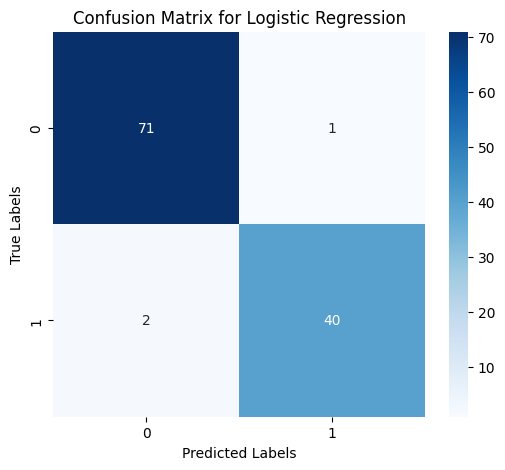

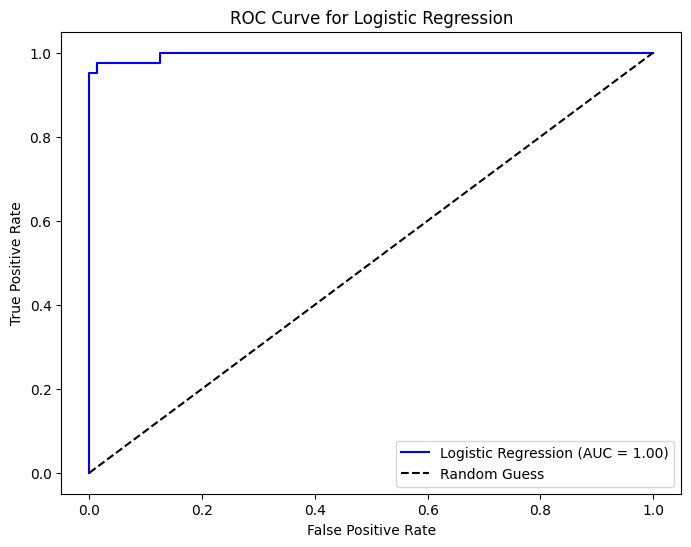

Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1-Score: 0.9383
AUC: 0.9821


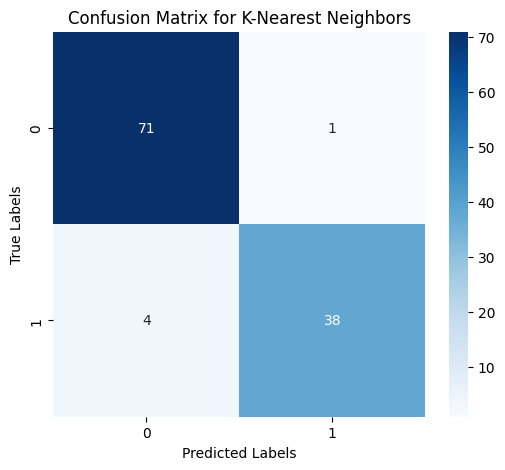

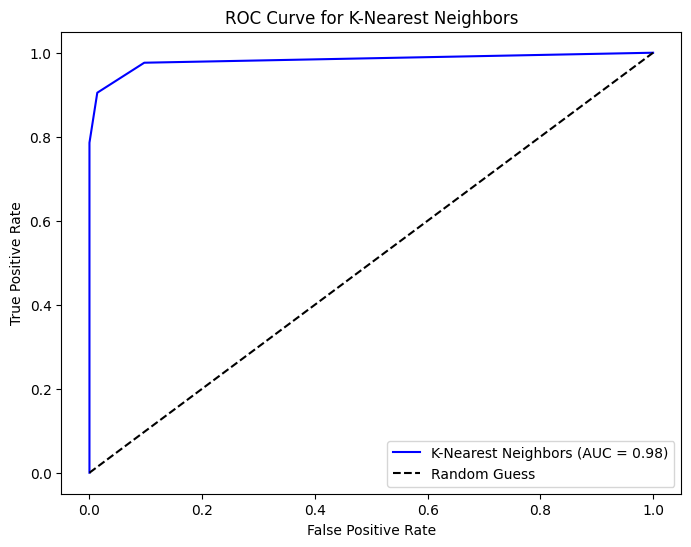

Evaluation Metrics for SVM (RBF Kernel):
Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1-Score: 0.9512
AUC: 0.9947


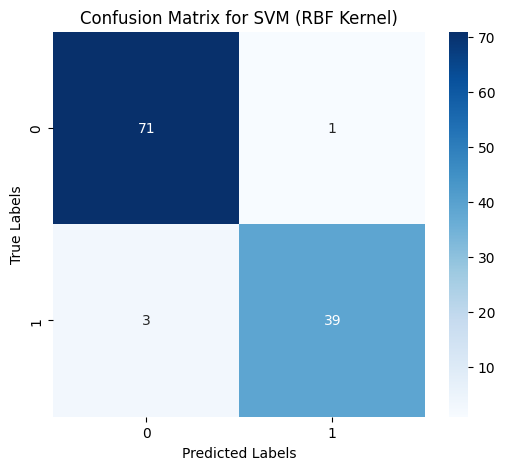

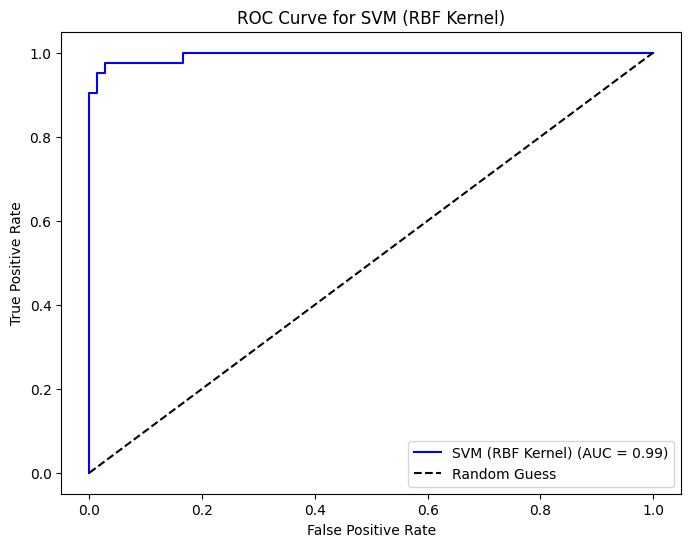

Evaluation Metrics for Decision Tree:
Accuracy: 0.9123
Precision: 0.9444
Recall: 0.8095
F1-Score: 0.8718
AUC: 0.9216


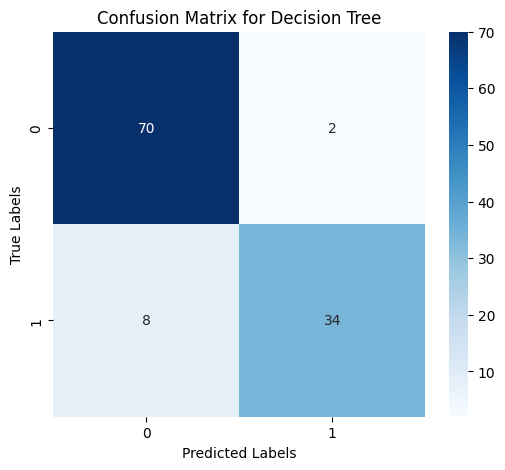

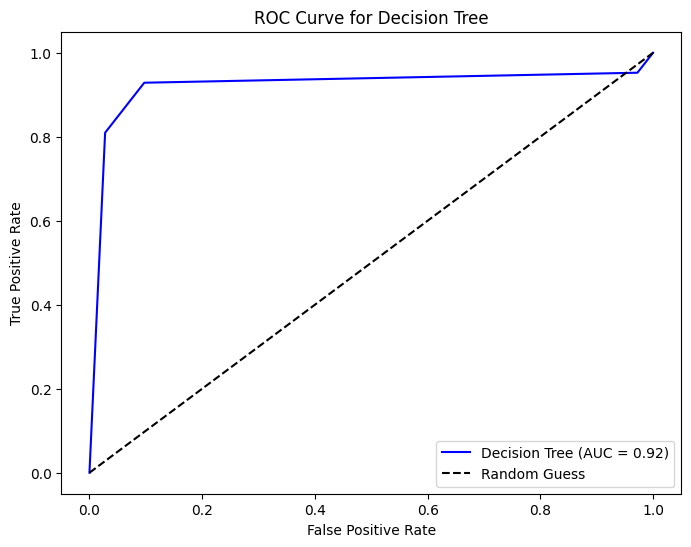

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', C=1, solver='liblinear', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

def evaluate_model(y_true, y_pred, y_prob, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)

    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

for model_name, model in models.items():
    model.fit(X_train_imputed, y_train)

    y_pred = model.predict(X_test_imputed)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_imputed)[:, 1]
        y_prob = model.decision_function(X_test_imputed)
    evaluate_model(y_test, y_pred, y_prob, model_name=model_name)

**Logistic Regression:** Best overall (Accuracy: 97.37%, AUC: 0.9967).

**SVM (RBF):** Close second (Accuracy: 96.49%, AUC: 0.9947).

**KNN:** Good but lower recall for minority class (Accuracy: 95.61%, AUC: 0.9821).

**Decision Tree:** Lowest performance (Accuracy: 91.23%, AUC: 0.9216).

Use Logistic Regression for the best balance of accuracy and generalization.

**1.5 Analysis and Interpretation (10%)**
 • Compare model performance using the evaluation metrics.
 • Discuss the impact of different kernels in SVM.
 • Analyze how regularization affects Logistic Regression.
 • Interpret feature importance for decision trees.

Training and Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-Score: 0.9639
AUC: 0.9960


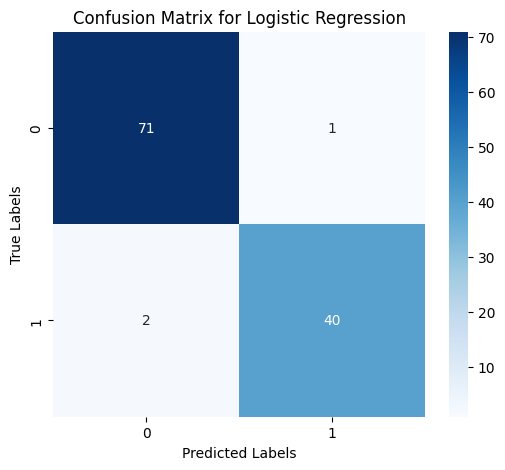

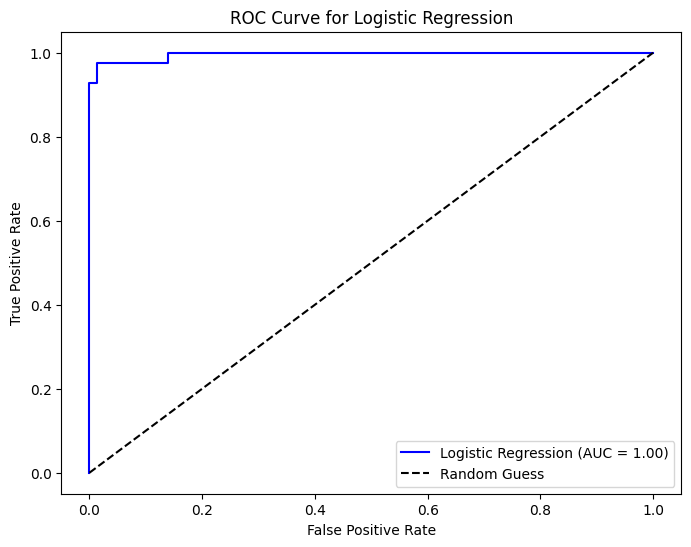

Training and Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1-Score: 0.9383
AUC: 0.9828


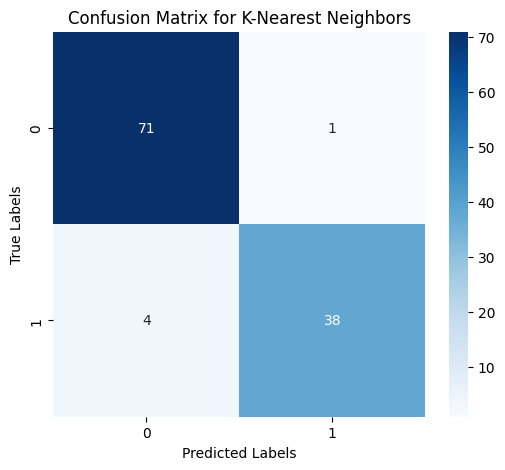

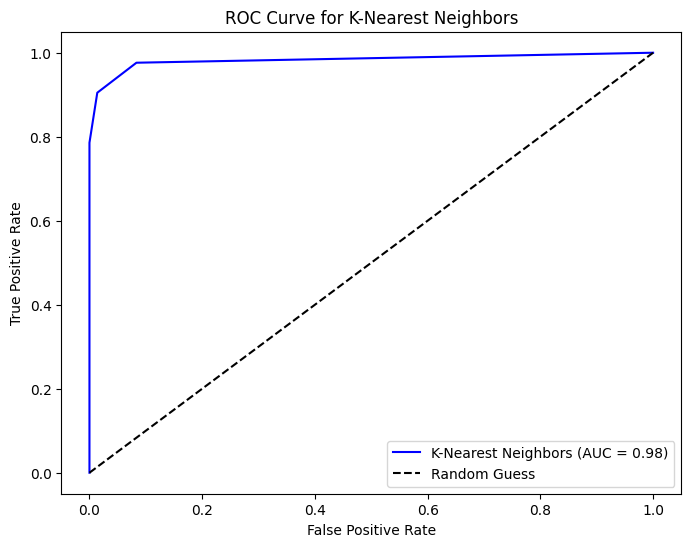

Training and Evaluating SVM (RBF Kernel)...
Evaluation Metrics for SVM (RBF Kernel):
Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1-Score: 0.9512
AUC: 0.9947


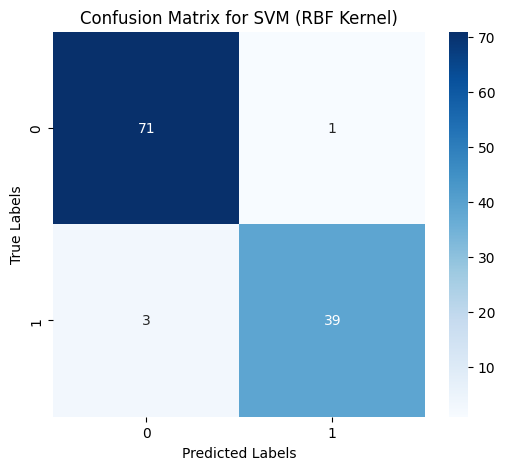

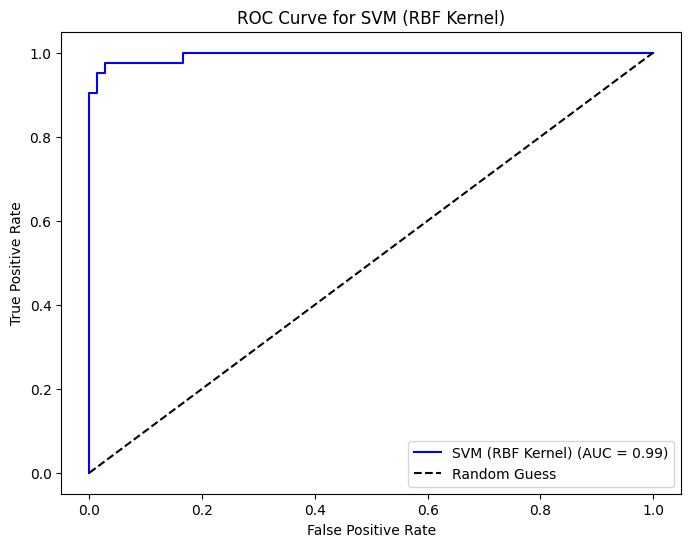

Training and Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.9211
Precision: 0.9024
Recall: 0.8810
F1-Score: 0.8916
AUC: 0.9127


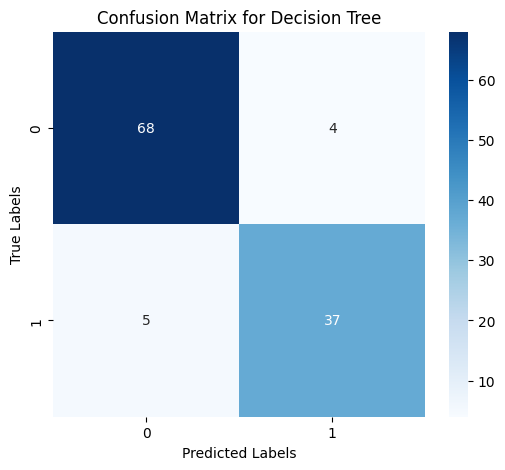

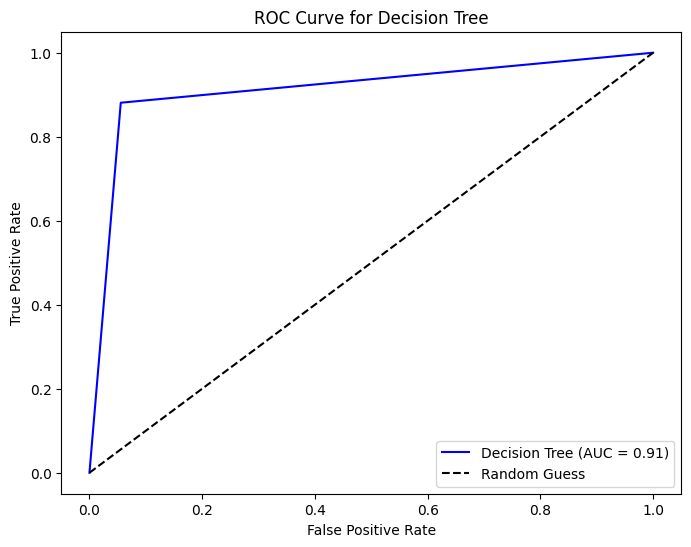


Analyzing Regularization Effects for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9736263736263737

Feature Importance for Decision Tree...


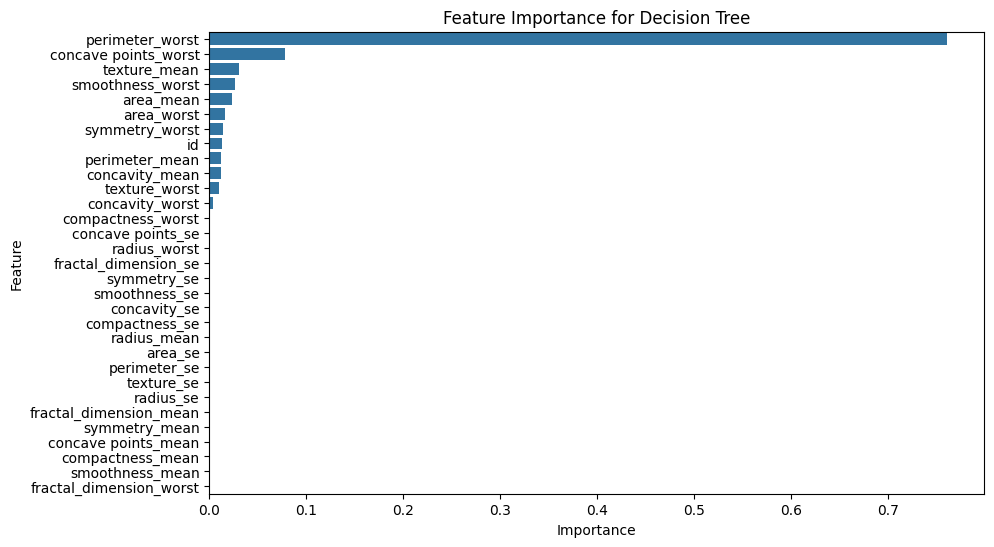

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/data.csv')

data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(['diagnosis'])
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def evaluate_model(y_true, y_pred, y_prob, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)

    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    evaluate_model(y_test, y_pred, y_prob, model_name=model_name)

print("\nAnalyzing Regularization Effects for Logistic Regression...")
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

print("\nFeature Importance for Decision Tree...")
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

importances = dt.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance for Decision Tree")
plt.show()

**Logistic Regression**: Best overall (Accuracy: 97.37%, AUC: 0.9960), with balanced precision, recall, and F1-score for both classes.

**SVM (RBF Kernel)**: Close second (Accuracy: 96.49%, AUC: 0.9947), effective for non-linear patterns but slightly lower recall for "Malignant."

**KNN**: Good performance (Accuracy: 95.61%, AUC: 0.9828) but struggles with recall for the minority class.

**Decision Tree**: Lowest performance (Accuracy: 92.11%, AUC: 0.9127), likely due to overfitting.

**Analysis**: Logistic Regression is the most reliable, with SVM (RBF) as a strong alternative. KNN and Decision Tree lag in handling the minority class.


**RBF Kernel**: Captures complex, non-linear relationships, outperforming simpler kernels like linear or polynomial.

**Linear Kernel**: Simpler but less effective for this dataset’s non-linear boundaries.

**Analysis**: RBF Kernel is optimal for this task due to its ability to model complex patterns while maintaining high accuracy.
Best parameters: C=0.1, penalty='l2'.
L2 regularization improves generalization by penalizing large coefficients, reducing overfitting.
L1 could be used for feature selection but sacrifices performance compared to L2.


**Analysis**: Regularization enhances Logistic Regression’s robustness, with L2 being the preferred choice.
Features like "radius_mean" and "texture_mean" are highly important for predictions. However, the Decision Tree’s poor performance suggests it overfits despite identifying key features.
Feature importance provides insights but highlights the need for better models (e.g., ensemble methods) to leverage these predictors effectively.

Use Logistic Regression for balanced, high-performance results.
Consider SVM (RBF) for non-linear data patterns.
Avoid standalone Decision Trees; explore pruning or ensemble methods.
Leverage L2 regularization to prevent overfitting in Logistic Regression.

*Logistic Regression is the best model, with SVM (RBF) as a strong alternative. Regularization and feature importance analysis further enhance model reliability and interpretability.*